## Import Library

In [ ]:
install.packages("quantmod")
library(quantmod)
library(dplyr)
library(tidyr)
library(ggplot2)


## Import Data

In [ ]:
# Daftar ticker saham
tickers <- c("AAPL", "AMZN", "NVDA","TSLA", "MSFT", "NFLX" ,"APP", "JNJ", "MSTR")

# Mengambil data saham dari Yahoo Finance
getSymbols(tickers, src = "yahoo", from = "2023-11-01", to = "2024-11-01")

# Ambil hanya data harga penutupan dan satukan dalam satu data frame
close_prices <- lapply(tickers, function(ticker) Cl(get(ticker)))

# Gabungkan data harga penutupan dalam satu data frame
merged_data <- do.call(merge, close_prices)

# Ubah hasilnya menjadi data frame
stocks <- data.frame(date = index(merged_data), coredata(merged_data))

stocks

[1] "AAPL" "AMZN" "NVDA" "TSLA" "MSFT" "NFLX" "APP"  "JNJ"  "MSTR"

date,AAPL.Close,AMZN.Close,NVDA.Close,TSLA.Close,MSFT.Close,NFLX.Close,APP.Close,JNJ.Close,MSTR.Close
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-11-01,173.97,137.00,42.325,205.66,346.07,420.19,36.70,148.69,42.667
2023-11-02,177.57,138.07,43.506,218.51,348.32,424.71,37.36,150.24,45.363
2023-11-03,176.65,138.60,45.005,219.96,352.80,432.36,39.27,151.34,45.395
2023-11-06,179.23,139.74,45.751,219.27,356.53,434.74,39.42,151.70,45.963
2023-11-07,181.82,142.71,45.955,222.18,360.53,434.61,40.89,150.90,47.355
2023-11-08,182.89,142.08,46.574,222.11,363.20,436.65,40.12,150.35,47.450
2023-11-09,182.41,140.60,46.950,209.98,360.69,435.15,39.68,147.42,49.407
2023-11-10,186.40,143.56,48.335,214.65,369.67,447.24,43.79,147.25,50.918
2023-11-13,184.80,142.59,48.620,223.71,366.68,444.62,41.41,147.63,50.488


### Plot Data Saham

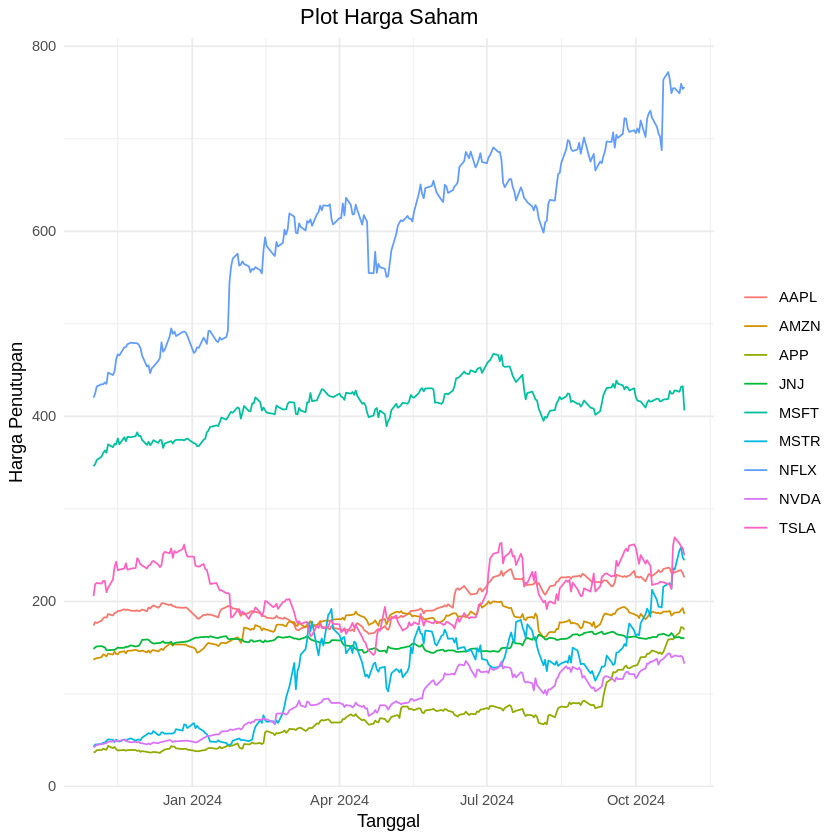

In [ ]:
# Install dan load paket yang dibutuhkan
# install.packages("ggplot2")
# install.packages("tidyr")
library(ggplot2)
library(tidyr)

# Mengambil data dari merged_data yang sudah ada
stocks_long <- stocks %>%
  pivot_longer(cols = -date, names_to = "ticker", values_to = "close_price")

# Menghapus akhiran ".close" pada nama ticker untuk legenda
stocks_long$ticker <- gsub("\\.Close", "", stocks_long$ticker)

# Plot Time Series dengan ggplot2
ggplot(stocks_long, aes(x = date, y = close_price, color = ticker)) +
  geom_line() +
  labs(title = "Plot Harga Saham", x = "Tanggal", y = "Harga Penutupan") +
  theme_minimal() +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5))  # Menambahkan hjust untuk memusatkan judul

In [ ]:
#Ekspor data saham ke excel
#install.packages("openxlsx")
#library(openxlsx)

# Menyimpan data ke file Excel
#write.xlsx(stocks, "output_data.xlsx", rowNames = FALSE)

#cat("Data berhasil diekspor ke 'output_data.xlsx'\n")

### Log Returns

In [ ]:
log_return <- stocks %>%
  mutate(across(ends_with(".Close"),
                ~ log(. / lag(.)),
                .names = "{.col}_log_ret")) %>%
  mutate(across(ends_with("_log_ret"),
                ~ replace_na(., 0))) %>%
  select(ends_with("_log_ret"))

log_return

AAPL.Close_log_ret,AMZN.Close_log_ret,NVDA.Close_log_ret,TSLA.Close_log_ret,MSFT.Close_log_ret,NFLX.Close_log_ret,APP.Close_log_ret,JNJ.Close_log_ret,MSTR.Close_log_ret
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.000000e+00,0.000000000
0.0204820610,0.0077799301,0.0275209255,0.0606074173,6.480531e-03,0.0106995672,0.017823854,1.037043e-02,0.061270988
-0.0051945994,0.0038312748,0.0338747469,0.0066139872,1.277967e-02,0.0178519777,0.049860251,7.294885e-03,0.000705205
0.0144995342,0.0081914616,0.0164400190,-0.0031418755,1.051709e-02,0.0054895881,0.003812375,2.375929e-03,0.012434775
0.0143473536,0.0210310537,0.0044490593,0.0131839645,1.115678e-02,-0.0002990853,0.036612264,-5.287541e-03,0.029835649
0.0058676489,-0.0044243540,0.0133797770,-0.0003150738,7.378513e-03,0.0046829014,-0.019010583,-3.651375e-03,0.002004140
-0.0026279551,-0.0104712693,0.0080407482,-0.0561604897,-6.934810e-03,-0.0034411597,-0.011027646,-1.968031e-02,0.040415604
0.0216379487,0.0208340265,0.0290726951,0.0219964985,2.459188e-02,0.0274045562,0.098558212,-1.153821e-03,0.030124336
-0.0086206938,-0.0067796957,0.0058790299,0.0413418340,-8.121239e-03,-0.0058753677,-0.055883108,2.577354e-03,-0.008480818


### Uji Normalitas

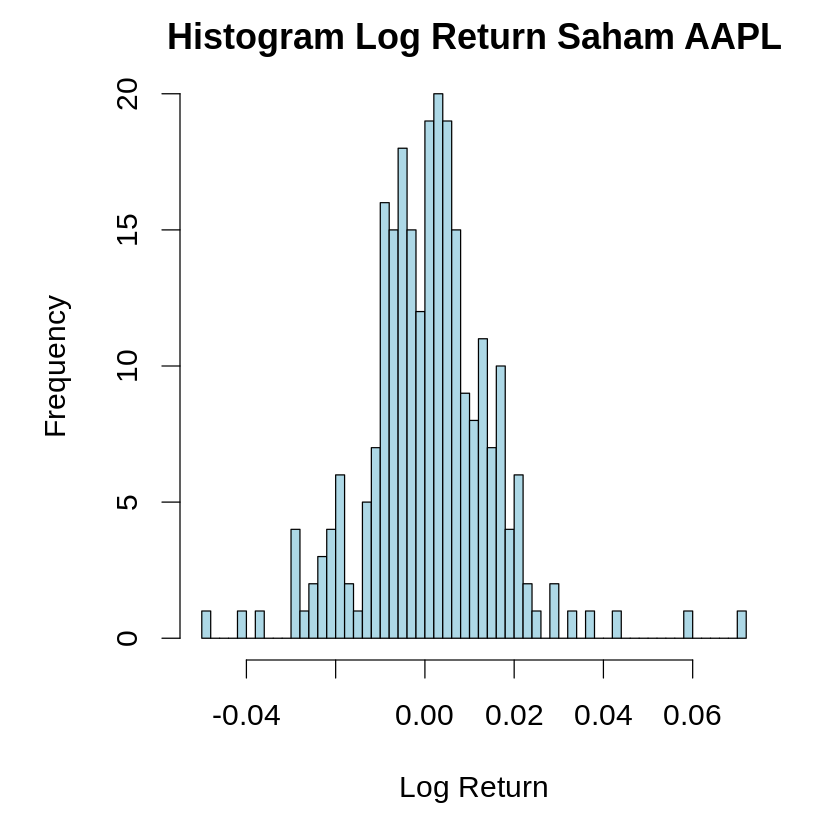

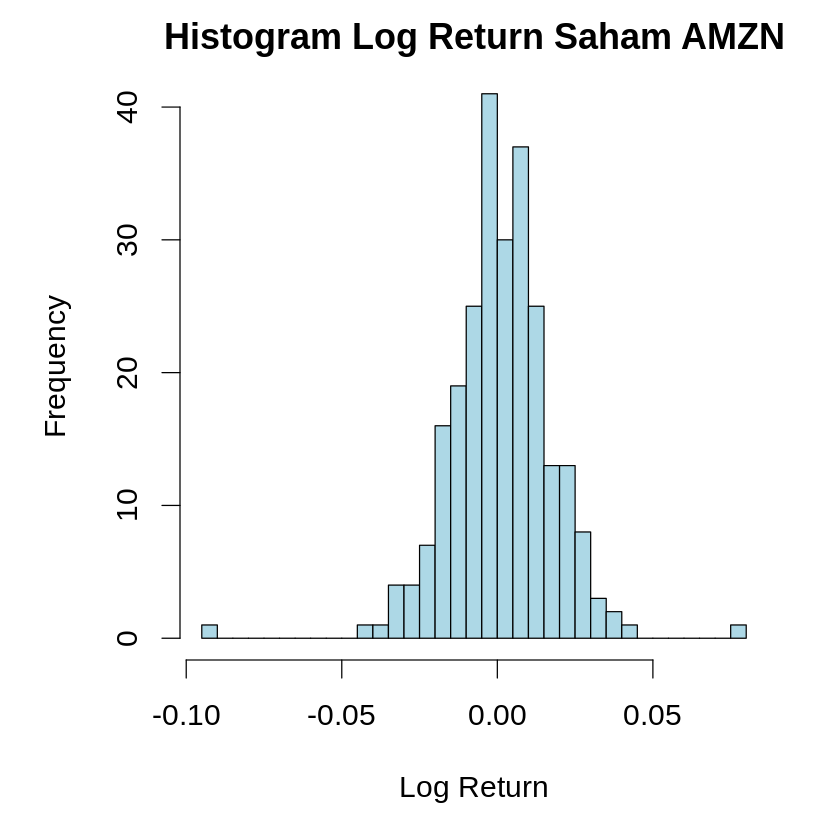

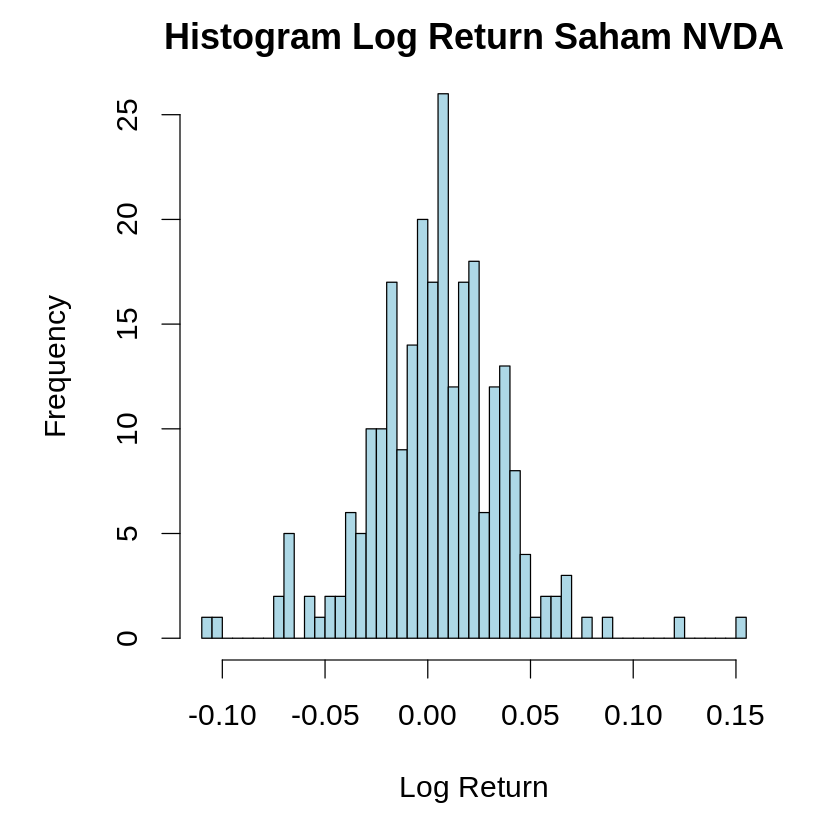

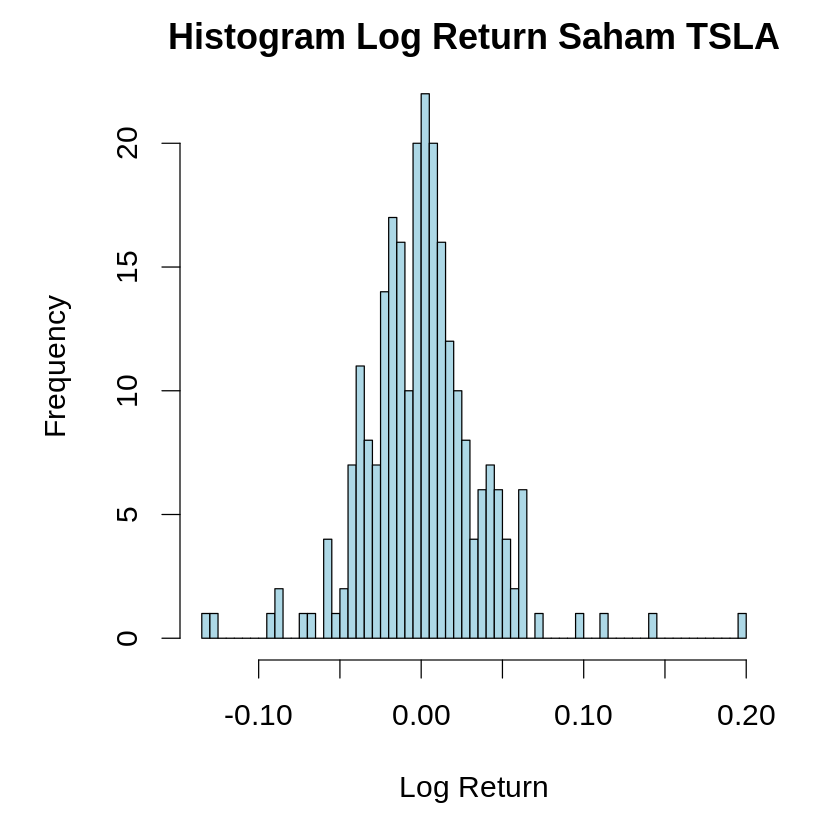

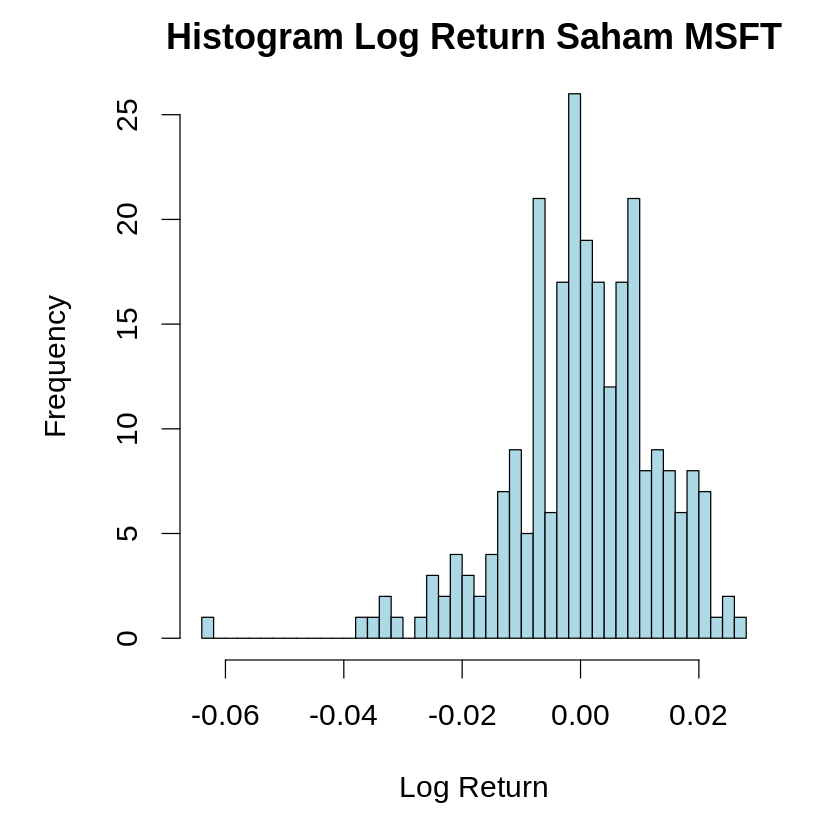

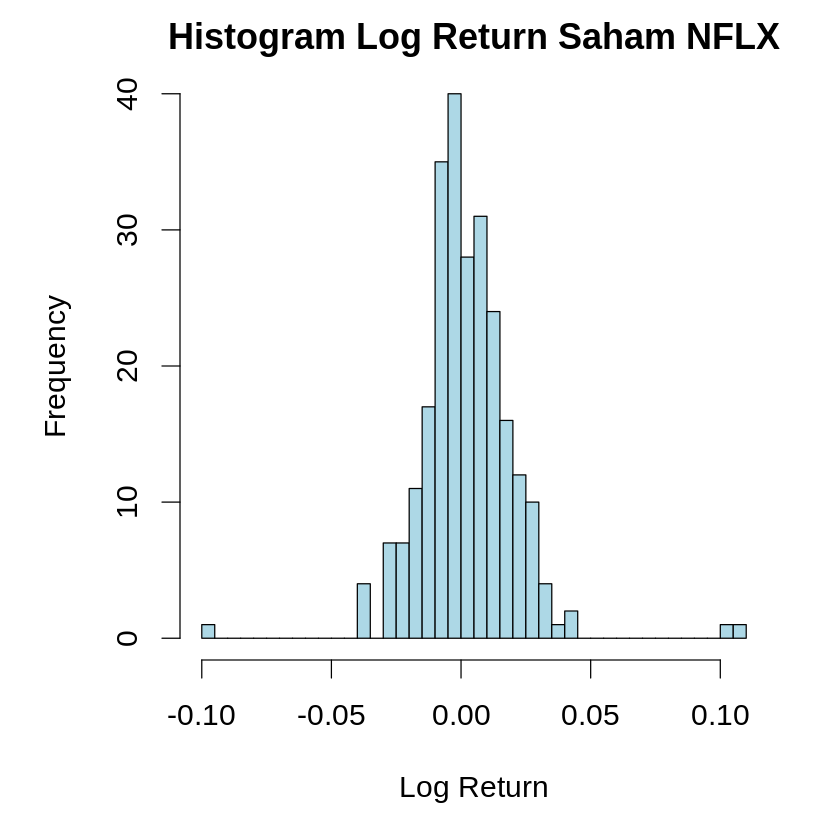

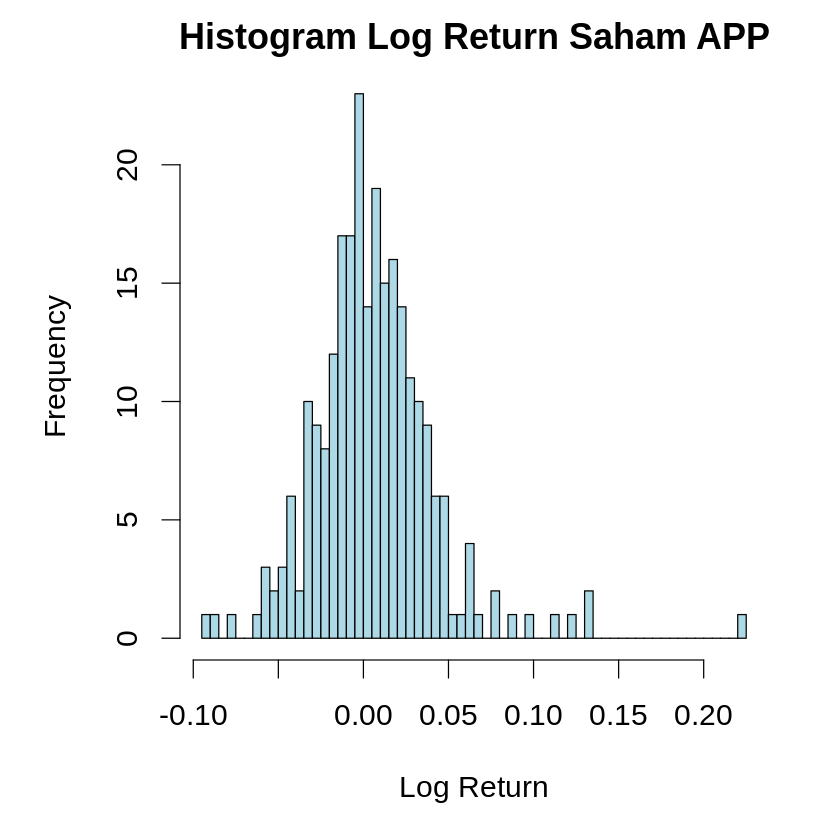

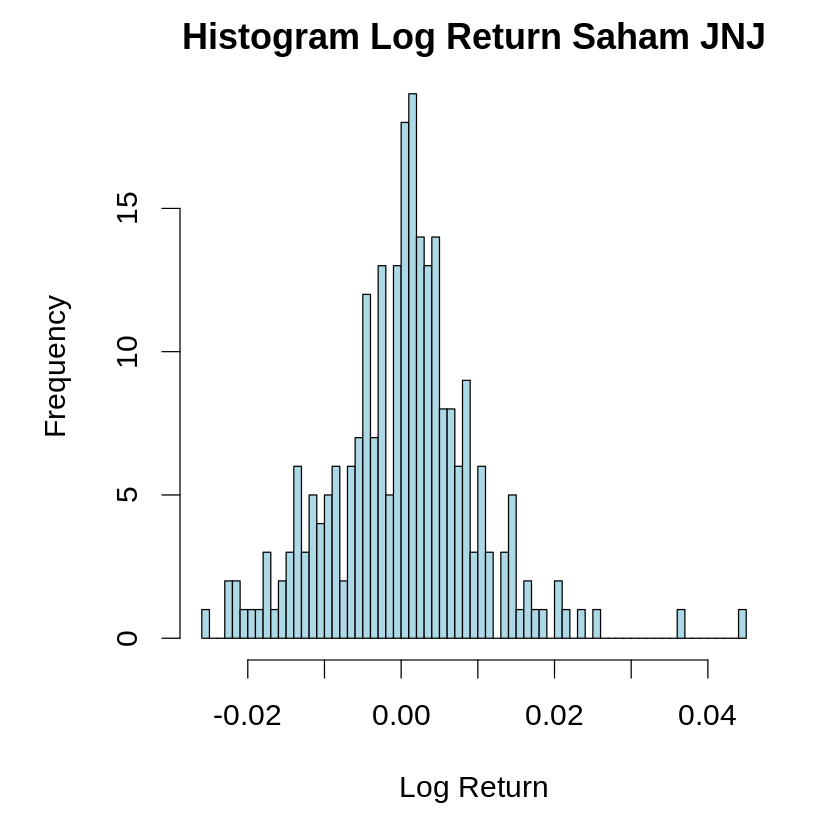

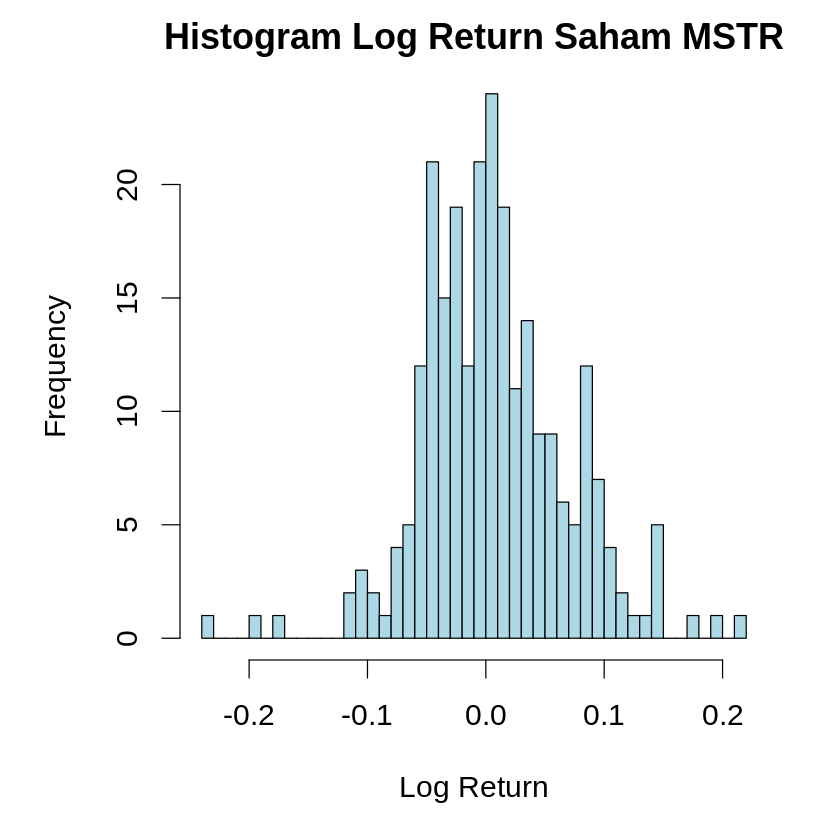

In [ ]:
# Membuat histogram log return

# Vektor simbol saham
symbols <- c("AAPL", "AMZN", "NVDA","TSLA", "MSFT", "NFLX" ,"APP", "JNJ", "MSTR")

par(mfrow = c(1, 1), mar = c(5, 5, 2, 2), cex = 1.5)

for (i in 1:length(log_return)) {
  hist(log_return[[i]],breaks = 50, main = paste("Histogram Log Return Saham", symbols[i]), xlab = "Log Return", col = "lightblue")
}

# Reset layout grafik ke default
par(mfrow = c(1, 1))

In [ ]:
# Nama saham
symbols <- c("AAPL", "AMZN", "NVDA", "TSLA", "MSFT", "NFLX", "APP", "JNJ", "MSTR")

# Membuat data frame kosong untuk menyimpan hasil
results <- data.frame(
  Symbol = character(),
  PValue = numeric(),
  Conclusion = character(),
  stringsAsFactors = FALSE
)

# Melakukan perulangan untuk setiap simbol saham
for (i in 1:length(symbols)) {
  # Uji normalitas dengan Kolmogorov-Smirnov
  pvalue <- ks.test(log_return[[i]], "pnorm", mean = mean(log_return[[i]]), sd = sd(log_return[[i]]))$p.value

  # Menentukan kesimpulan berdasarkan p-value
  if (pvalue < 0.05) {
    conclusion <- "H0 ditolak, data tidak berdistribusi normal"
  } else {
    conclusion <- "H0 tidak ditolak, data berdistribusi normal"
  }

  # Menambahkan hasil ke data frame
  results <- rbind(results, data.frame(Symbol = symbols[i], PValue = pvalue, Conclusion = conclusion))
}

# Menampilkan data frame hasil
print(results)


Warning message in ks.test.default(log_return[[i]], "pnorm", mean = mean(log_return[[i]]), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(log_return[[i]], "pnorm", mean = mean(log_return[[i]]), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(log_return[[i]], "pnorm", mean = mean(log_return[[i]]), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


  Symbol     PValue                                  Conclusion
1   AAPL 0.09915245 H0 tidak ditolak, data berdistribusi normal
2   AMZN 0.60861479 H0 tidak ditolak, data berdistribusi normal
3   NVDA 0.52931415 H0 tidak ditolak, data berdistribusi normal
4   TSLA 0.09562950 H0 tidak ditolak, data berdistribusi normal
5   MSFT 0.09931913 H0 tidak ditolak, data berdistribusi normal
6   NFLX 0.09432939 H0 tidak ditolak, data berdistribusi normal
7    APP 0.10515908 H0 tidak ditolak, data berdistribusi normal
8    JNJ 0.25304440 H0 tidak ditolak, data berdistribusi normal
9   MSTR 0.08316365 H0 tidak ditolak, data berdistribusi normal


## Antithetic Variate Simulation

### Fungsi Antithetic Variate Simulation

In [ ]:
antithetic_call_mc <- function(nSim, tau, r, sigma, S0, K, actual_call_price) {
  Z <- rnorm(nSim, mean = 0, sd = 1)
  WT <- sqrt(tau) * Z

  # ST1 and ST2 (antithetic variates)
  ST1 <- S0 * exp((r - 0.5 * sigma^2) * tau + sigma * WT)
  ST2 <- S0 * exp((r - 0.5 * sigma^2) * tau + sigma * (-WT))

  # Call option price and standard error
  simulated_call_payoffs1 <- exp(-r * tau) * pmax(ST1 - K, 0)
  simulated_call_payoffs2 <- exp(-r * tau) * pmax(ST2 - K, 0)
  simulated_call_payoffs <- (simulated_call_payoffs1 + simulated_call_payoffs2) / 2

  price_call <- mean(simulated_call_payoffs)
  sterr_call <- sd(simulated_call_payoffs) / sqrt(nSim)

  # Calculate MAPE for call price
  mape_call <- mean(abs((actual_call_price - price_call) / actual_call_price)) * 100

  # Output results
  output <- list(
    price_call = price_call,
    sterr_call = sterr_call,
    mape_call = mape_call
  )

  return(output)
}

### Saham AAPL

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$AAPL.Close_log_ret),
  sigma = sd(log_return$AAPL.Close_log_ret),
  S0 = 225.91,
  K = 100,
  actual_call_price = 128.35  # Harga aktual opsi call
)
print(results)


$price_call
[1] 125.9162

$sterr_call
[1] 1.926834e-06

$mape_call
[1] 1.896183



### Saham AMZN

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$AMZN.Close_log_ret),
  sigma = sd(log_return$AMZN.Close_log_ret),
  S0 = 186.40,
  K = 100,
  actual_call_price = 100.45  # Harga aktual opsi call
)
print(results)


$price_call
[1] 86.40737

$sterr_call
[1] 2.128399e-06

$mape_call
[1] 13.97973



### Saham NVDA

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$NVDA.Close_log_ret),
  sigma = sd(log_return$NVDA.Close_log_ret),
  S0 = 132.76,
  K = 50,
  actual_call_price = 92.16  # Harga aktual opsi call
)
print(results)


$price_call
[1] 82.77367

$sterr_call
[1] 5.880196e-06

$mape_call
[1] 10.18482



### Saham TSLA

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$TSLA.Close_log_ret),
  sigma = sd(log_return$TSLA.Close_log_ret),
  S0 = 249.85,
  K = 75,
  actual_call_price = 267.3  # Harga aktual opsi call
)
print(results)


$price_call
[1] 174.8535

$sterr_call
[1] 1.394225e-05

$mape_call
[1] 34.5853



### Saham MSFT

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$MSFT.Close_log_ret),
  sigma = sd(log_return$MSFT.Close_log_ret),
  S0 = 406.35,
  K = 240,
  actual_call_price = 177.1  # Harga aktual opsi call
)
print(results)

$price_call
[1] 166.3592

$sterr_call
[1] 2.654119e-06

$mape_call
[1] 6.064812



### Saham NFLX

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$NFLX.Close_log_ret),
  sigma = sd(log_return$NFLX.Close_log_ret),
  S0 = 756.03,
  K = 250,
  actual_call_price = 513.26  # Harga aktual opsi call
)
print(results)

$price_call
[1] 506.0651

$sterr_call
[1] 1.082918e-05

$mape_call
[1] 1.4018



### Saham APP

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$APP.Close_log_ret),
  sigma = sd(log_return$APP.Close_log_ret),
  S0 = 169.39,
  K = 70,
  actual_call_price = 203 # Harga aktual opsi call
)
print(results)

$price_call
[1] 99.4156

$sterr_call
[1] 9.270065e-06

$mape_call
[1] 51.0268



### Saham JNJ

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$JNJ.Close_log_ret),
  sigma = sd(log_return$JNJ.Close_log_ret),
  S0 = 159.86,
  K = 139,
  actual_call_price = 14.11  # Harga aktual opsi call
)
print(results)

$price_call
[1] 20.86241

$sterr_call
[1] 6.184387e-07

$mape_call
[1] 47.85548



### Saham MSTR

In [ ]:
set.seed(1)
results <- antithetic_call_mc(
  nSim = 1000000,
  tau = 22 / 365,
  r = mean(log_return$MSTR.Close_log_ret),
  sigma = sd(log_return$MSTR.Close_log_ret),
  S0 = 244.5,
  K = 30,
  actual_call_price = 272.55  # Harga aktual opsi call
)
print(results)

$price_call
[1] 214.5125

$sterr_call
[1] 3.965475e-05

$mape_call
[1] 21.29425

